In [5]:
# we have to predict death event

In [6]:
import pandas as pd 
import numpy as np

In [9]:
# fetching data
ClinicalRecordData=pd.read_csv('C:/Users/USER/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/New folder/heart_failure_clinical_records_dataset.csv',encoding='latin1')

In [10]:

ClinicalRecordData.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


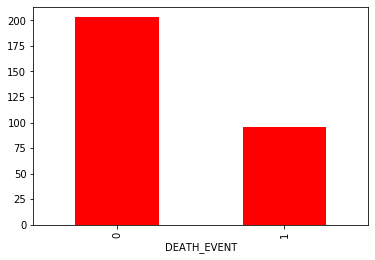

In [11]:
# TargetVariable is 'DEATH_EVENT'
# visual diagram 'DEATH_EVENT'
%matplotlib inline 
ClinicalRecordData.groupby('DEATH_EVENT').size().plot(kind='bar',color='red')

In [13]:
# data set information
# no missing values and no Strings
ClinicalRecordData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [14]:
# understanding Predictors
# 'anaemia','sex','smoking','diabetes ','high_blood_pressure' are chategorical data
ClinicalRecordData.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DD5F2DB38>,
      dtype=object)

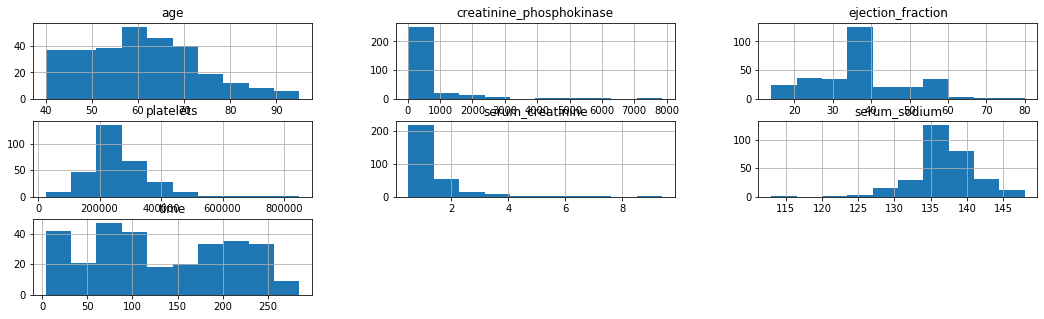

In [20]:
# visual diagram of continuous predictors
ClinicalRecordData.hist(['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'],figsize=(18,5))

In [25]:
ClinicalRecordData.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [35]:
# # visual diagram of chategorical data type
def barplotchart(inpdata,clt):
    import matplotlib.pyplot as plt
    fig,subplot=plt.subplots(ncols=1,nrows=len(clt),figsize=(8,5))
    fig.suptitle('bar charts of chategorical predictors')
    for ColName, PlotNumber in zip(clt,range(len(clt))):
        inpdata.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNumber],color='red')
        
        

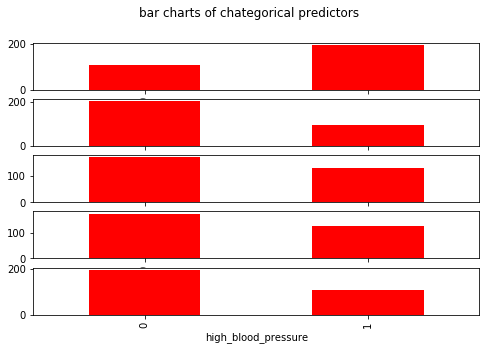

In [36]:
 barplotchart(inpdata=ClinicalRecordData,clt=['sex','smoking','anaemia','diabetes','high_blood_pressure'])

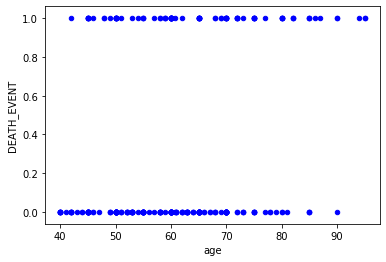

In [37]:
ClinicalRecordData.plot.scatter(x='age',y= 'DEATH_EVENT',marker='o',color='blue')

In [40]:
ClinicalRecordData['age'][ClinicalRecordData['age']>86]=86

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


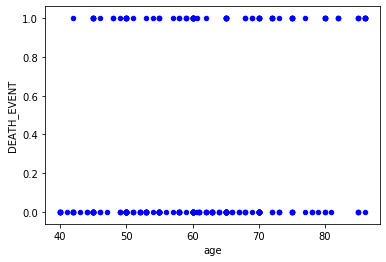

In [41]:
ClinicalRecordData.plot.scatter(x='age',y= 'DEATH_EVENT',marker='o',color='blue')

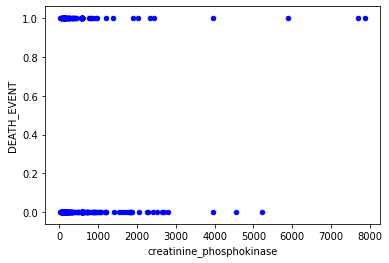

In [42]:
ClinicalRecordData.plot.scatter(x='creatinine_phosphokinase',y='DEATH_EVENT',marker='o',color='blue')

In [55]:
ClinicalRecordData['creatinine_phosphokinase'][ClinicalRecordData['creatinine_phosphokinase']>2800]=2800

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


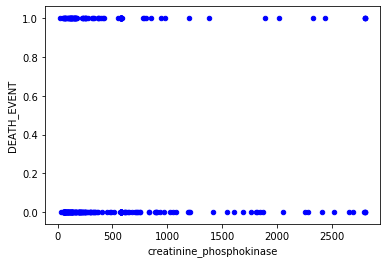

In [56]:
ClinicalRecordData.plot.scatter(x='creatinine_phosphokinase',y='DEATH_EVENT',marker='o',color='blue')

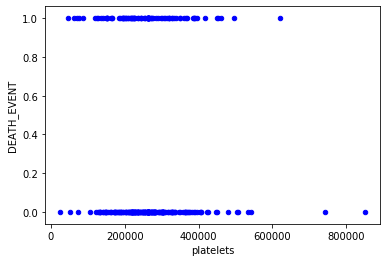

In [54]:
ClinicalRecordData.plot.scatter(x='platelets',y='DEATH_EVENT',marker='o',color='blue')

In [63]:
ClinicalRecordData['platelets'][ClinicalRecordData['platelets']>550000]=550000

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


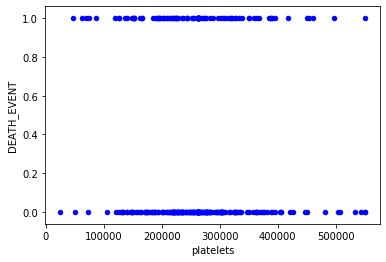

In [64]:
ClinicalRecordData.plot.scatter(x='platelets',y='DEATH_EVENT',marker='o',color='blue')

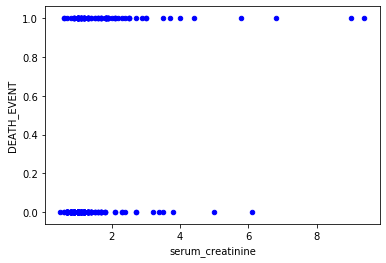

In [65]:
ClinicalRecordData.plot.scatter(x='serum_creatinine',y='DEATH_EVENT',marker='o',color='blue')

In [66]:
ClinicalRecordData['serum_creatinine'][ClinicalRecordData['serum_creatinine']>4]=4

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


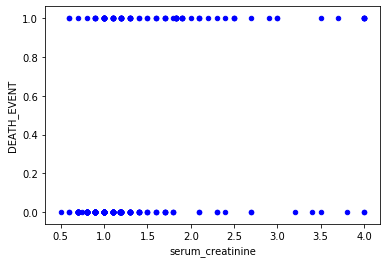

In [67]:
ClinicalRecordData.plot.scatter(x='serum_creatinine',y='DEATH_EVENT',marker='o',color='blue')

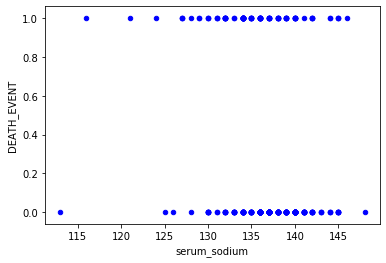

In [68]:
ClinicalRecordData.plot.scatter(x='serum_sodium',y='DEATH_EVENT',marker='o',color='blue')

In [69]:
ClinicalRecordData['serum_sodium'][ClinicalRecordData['serum_sodium']>145]=145

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
ClinicalRecordData['serum_sodium'][ClinicalRecordData['serum_sodium']<127]=125

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


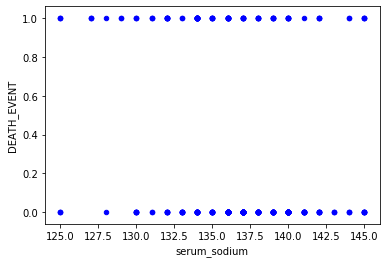

In [73]:
ClinicalRecordData.plot.scatter(x='serum_sodium',y='DEATH_EVENT',marker='o',color='blue')

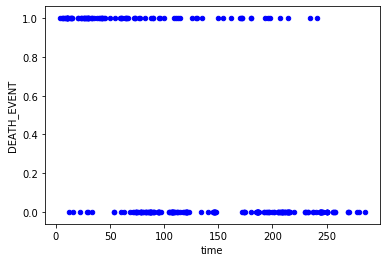

In [75]:
ClinicalRecordData.plot.scatter(x='time',y='DEATH_EVENT',marker='o',color='blue')

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


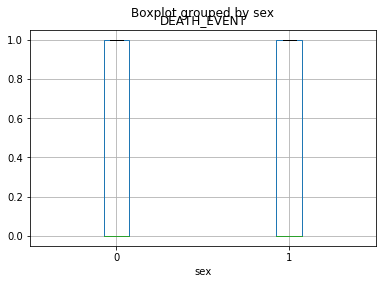

In [76]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='sex',vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


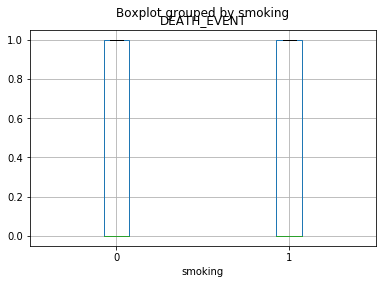

In [77]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='smoking',vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


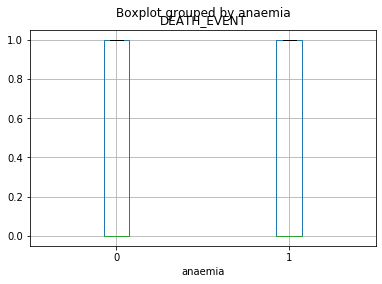

In [78]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='anaemia',vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


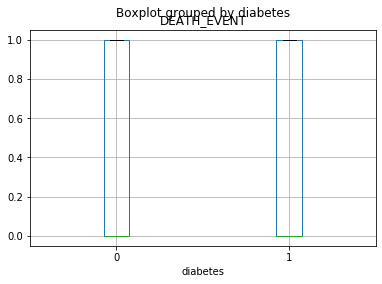

In [79]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='diabetes',vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


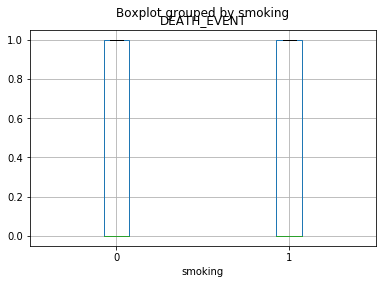

In [80]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='smoking',vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


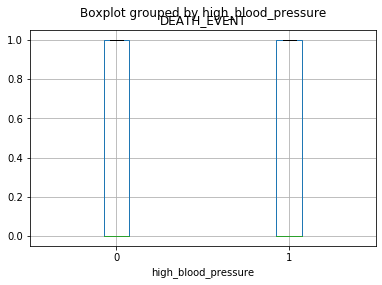

In [81]:
ClinicalRecordData.boxplot(column='DEATH_EVENT',by='high_blood_pressure',vert=True)

In [82]:
###### Data Preprocessing######

#___________________________________________

In [83]:
# checking missing values
# no missing values has found
ClinicalRecordData.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [84]:
##### Machine Learning#######

#_______________________________________

In [87]:
TargetVariable= 'DEATH_EVENT'
Predictors=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [88]:
ClinicalRecordData.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [90]:
x=ClinicalRecordData[Predictors].values
y=ClinicalRecordData[TargetVariable].values

In [91]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 2.800e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=570)

In [94]:
x_train

array([[ 75.,   0., 582., ...,   1.,   0.,  87.],
       [ 45.,   1., 981., ...,   1.,   0.,  11.],
       [ 65.,   0., 157., ...,   0.,   0.,  10.],
       ...,
       [ 75.,   0., 582., ...,   0.,   0.,  23.],
       [ 78.,   1.,  64., ...,   1.,   1., 187.],
       [ 51.,   0.,  78., ...,   1.,   0.,  79.]])

In [95]:
x_train.shape

(209, 12)

In [96]:
#### Logistic Regression####

#____________________________________________

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr=LogisticRegression()

In [99]:
regmodel=lr.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
Prediction=regmodel.predict(x_test)

In [101]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction))
print(metrics.confusion_matrix(y_test, Prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.77      0.66      0.71        35

    accuracy                           0.79        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.79      0.79      0.79        90

[[48  7]
 [12 23]]
Accuracy of the model: 0.79


In [102]:
trainresults=pd.DataFrame(data=x_test,columns=Predictors)
trainresults[TargetVariable]=y_test
trainresults['predicted_DEATH_EVENT']=Prediction

In [103]:
trainresults.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
0,70.0,0.0,93.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0,208.0,0,0
1,65.0,1.0,113.0,1.0,60.0,1.0,203000.0,0.9,140.0,0.0,0.0,94.0,0,0
2,70.0,0.0,582.0,0.0,40.0,0.0,51000.0,2.7,136.0,1.0,1.0,250.0,0,0
3,58.0,1.0,145.0,0.0,25.0,0.0,219000.0,1.2,137.0,1.0,1.0,170.0,1,0
4,45.0,0.0,2800.0,1.0,25.0,1.0,390000.0,1.0,139.0,1.0,0.0,60.0,1,1


In [104]:
###### Decision Tree#####

#__________________________________________-

In [105]:
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')


In [106]:
regmodel1=clf.fit(x_train,y_train)

In [107]:
Prediction1=regmodel1.predict(x_test)

In [108]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction1))
print(metrics.confusion_matrix(y_test, Prediction1))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction1).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        55
           1       0.83      0.69      0.75        35

    accuracy                           0.82        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.82      0.82      0.82        90

[[50  5]
 [11 24]]
Accuracy of the model: 0.82


In [109]:
trainresults1=pd.DataFrame(data=x_test,columns=Predictors)
trainresults1[TargetVariable]=y_test
trainresults1['predicted_DEATH_EVENT']=Prediction1

In [110]:
trainresults1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
0,70.0,0.0,93.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0,208.0,0,0
1,65.0,1.0,113.0,1.0,60.0,1.0,203000.0,0.9,140.0,0.0,0.0,94.0,0,0
2,70.0,0.0,582.0,0.0,40.0,0.0,51000.0,2.7,136.0,1.0,1.0,250.0,0,0
3,58.0,1.0,145.0,0.0,25.0,0.0,219000.0,1.2,137.0,1.0,1.0,170.0,1,0
4,45.0,0.0,2800.0,1.0,25.0,1.0,390000.0,1.0,139.0,1.0,0.0,60.0,1,1


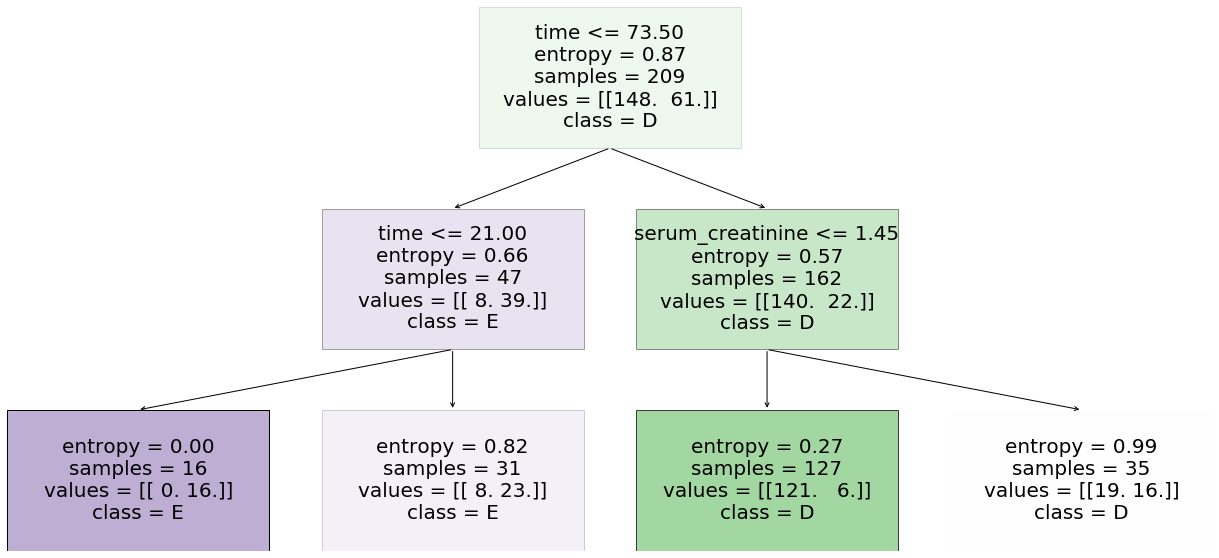

In [111]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [112]:
####### Random Forest########

#______________________________________________

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf=RandomForestClassifier(max_depth=3,n_estimators=200,criterion='entropy')

In [115]:
regmodel2=rf.fit(x_train,y_train)

In [116]:
Prediction2=regmodel2.predict(x_test)

In [117]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction2))
print(metrics.confusion_matrix(y_test, Prediction2))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction2).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.81      0.95      0.87        55
           1       0.88      0.66      0.75        35

    accuracy                           0.83        90
   macro avg       0.85      0.80      0.81        90
weighted avg       0.84      0.83      0.83        90

[[52  3]
 [12 23]]
Accuracy of the model: 0.83


In [118]:
trainresults2=pd.DataFrame(data=x_test,columns=Predictors)
trainresults2[TargetVariable]=y_test
trainresults2['predicted_DEATH_EVENT']=Prediction2

In [121]:
trainresults2.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
85,50.0,1.0,159.0,1.0,30.0,0.0,302000.0,1.2,138.0,0.0,0.0,29.0,0,1
86,75.0,0.0,675.0,1.0,60.0,0.0,265000.0,1.4,125.0,0.0,0.0,205.0,0,0
87,65.0,1.0,258.0,1.0,25.0,0.0,198000.0,1.4,129.0,1.0,0.0,235.0,1,0
88,60.0,1.0,582.0,0.0,30.0,1.0,127000.0,0.9,145.0,0.0,0.0,95.0,0,0
89,70.0,1.0,69.0,1.0,50.0,1.0,351000.0,1.0,134.0,0.0,0.0,44.0,1,1


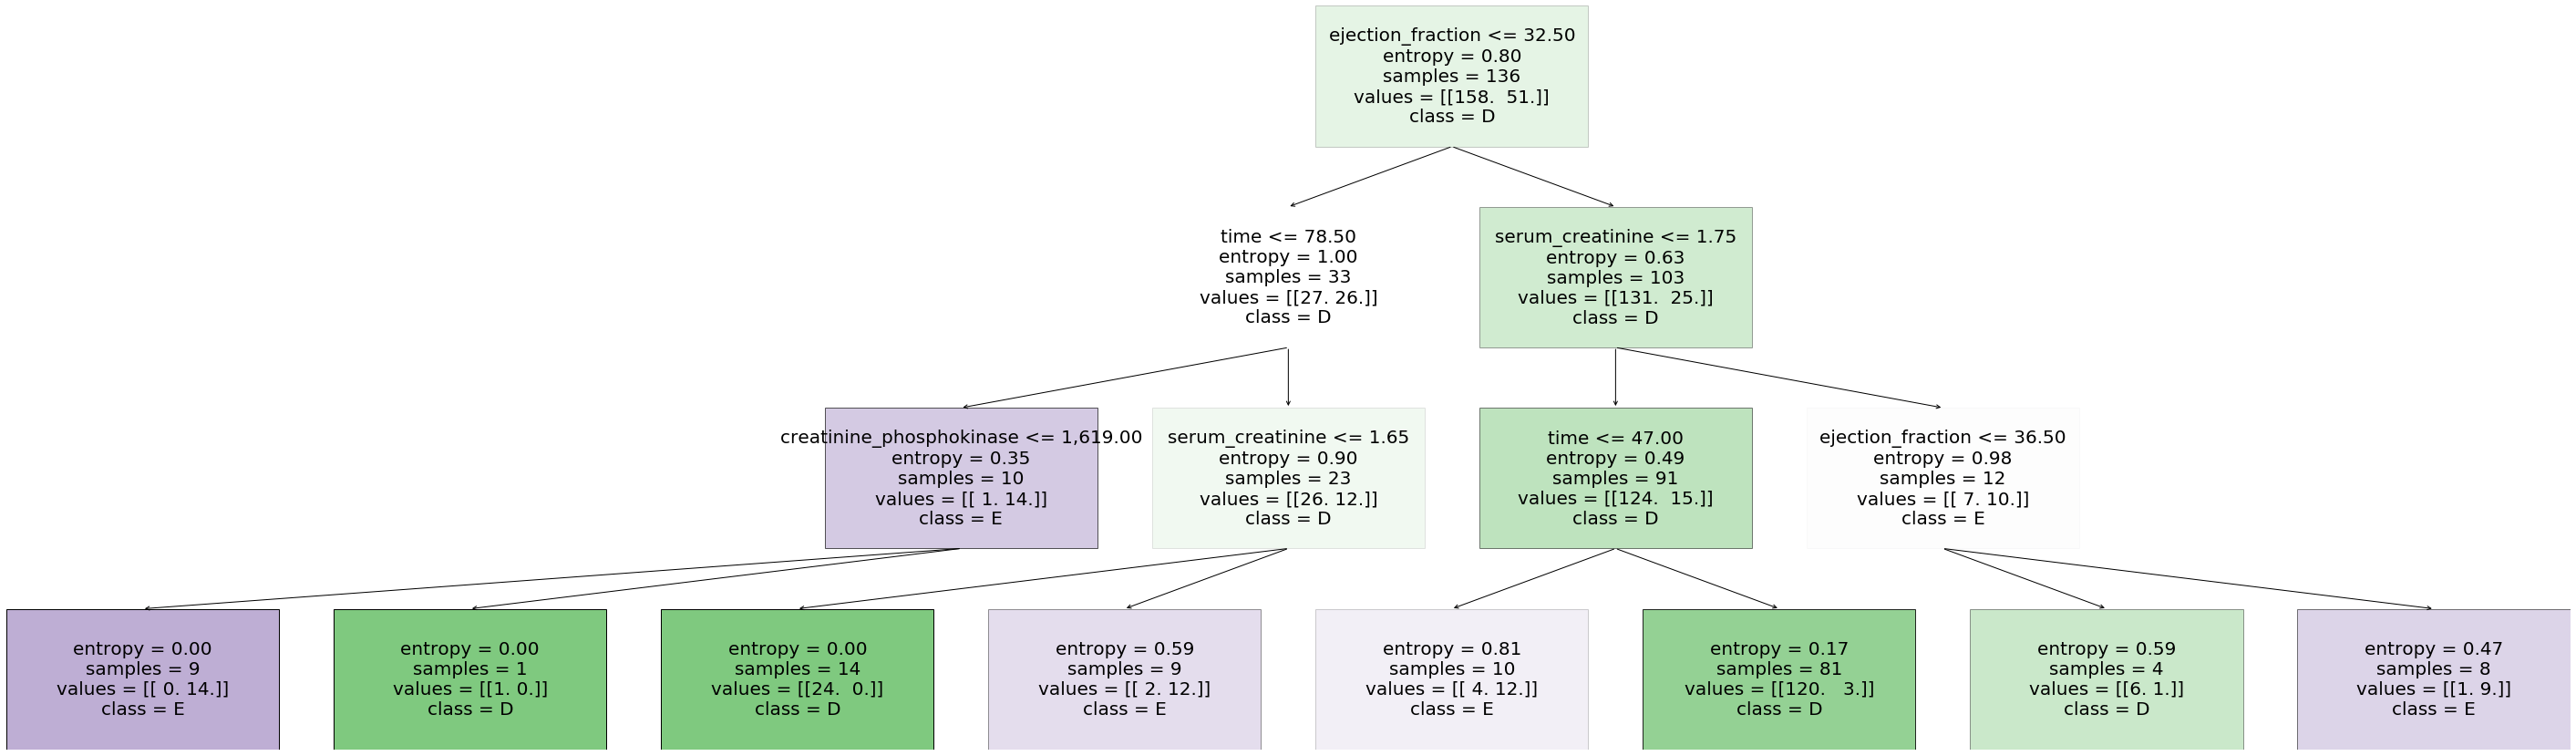

In [122]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=rf.estimators_[10], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [123]:
#### AdaBoost#####

#_________________________________________________

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dtc=DecisionTreeClassifier(max_depth=1)

In [127]:
ar=AdaBoostClassifier(n_estimators=50,base_estimator=dtc,learning_rate=1)

In [128]:
regmodel3=ar.fit(x_train,y_train)

In [129]:
Prediction3=regmodel3.predict(x_test)

In [130]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction3))
print(metrics.confusion_matrix(y_test, Prediction3))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction3).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.77      0.66      0.71        35

    accuracy                           0.79        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.79      0.79      0.79        90

[[48  7]
 [12 23]]
Accuracy of the model: 0.79


In [131]:
trainresults3=pd.DataFrame(data=x_test,columns=Predictors)
trainresults3[TargetVariable]=y_test
trainresults3['predicted_DEATH_EVENT']=Prediction3

In [132]:
trainresults3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
0,70.0,0.0,93.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0,208.0,0,0
1,65.0,1.0,113.0,1.0,60.0,1.0,203000.0,0.9,140.0,0.0,0.0,94.0,0,0
2,70.0,0.0,582.0,0.0,40.0,0.0,51000.0,2.7,136.0,1.0,1.0,250.0,0,0
3,58.0,1.0,145.0,0.0,25.0,0.0,219000.0,1.2,137.0,1.0,1.0,170.0,1,0
4,45.0,0.0,2800.0,1.0,25.0,1.0,390000.0,1.0,139.0,1.0,0.0,60.0,1,0


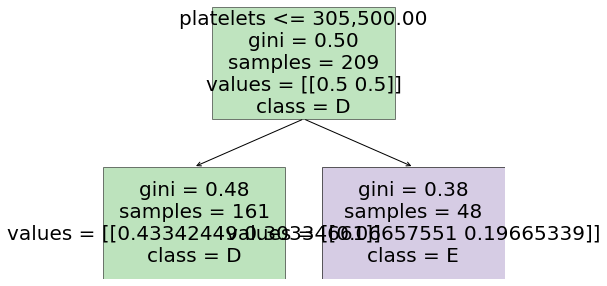

In [133]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=ar.estimators_[6], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [134]:
####XgBoost#####

#_________________________________________________

In [135]:
from xgboost import XGBClassifier

In [136]:
xg=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

In [137]:
regmodel4=xg.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [138]:
Prediction4=regmodel4.predict(x_test)

In [139]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction4))
print(metrics.confusion_matrix(y_test, Prediction4))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction4).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.85      0.91      0.88        55
           1       0.84      0.74      0.79        35

    accuracy                           0.84        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90

[[50  5]
 [ 9 26]]
Accuracy of the model: 0.84


In [140]:
trainresults4=pd.DataFrame(data=x_test,columns=Predictors)
trainresults4[TargetVariable]=y_test
trainresults4['predicted_DEATH_EVENT']=Prediction4

In [141]:
trainresults4.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
0,70.0,0.0,93.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0,208.0,0,0
1,65.0,1.0,113.0,1.0,60.0,1.0,203000.0,0.9,140.0,0.0,0.0,94.0,0,0
2,70.0,0.0,582.0,0.0,40.0,0.0,51000.0,2.7,136.0,1.0,1.0,250.0,0,0
3,58.0,1.0,145.0,0.0,25.0,0.0,219000.0,1.2,137.0,1.0,1.0,170.0,1,0
4,45.0,0.0,2800.0,1.0,25.0,1.0,390000.0,1.0,139.0,1.0,0.0,60.0,1,1


In [142]:
#####Svm##########

#_________________________________________

In [143]:
from sklearn import svm

In [144]:
clf=svm.SVC(C=20,kernel='rbf',gamma=0.01)

In [145]:
regmodel5=clf.fit(x_train,y_train)

In [146]:
Prediction5=regmodel5.predict(x_test)

In [147]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction5))
print(metrics.confusion_matrix(y_test, Prediction5))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction5).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.61      1.00      0.76        55
           1       0.00      0.00      0.00        35

    accuracy                           0.61        90
   macro avg       0.31      0.50      0.38        90
weighted avg       0.37      0.61      0.46        90

[[55  0]
 [35  0]]
Accuracy of the model: 0.46


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
trainresults5=pd.DataFrame(data=x_test,columns=Predictors)
trainresults5[TargetVariable]=y_test
trainresults5['predicted_DEATH_EVENT']=Prediction5


In [149]:
trainresults5.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,predicted_DEATH_EVENT
0,70.0,0.0,93.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0,208.0,0,0
1,65.0,1.0,113.0,1.0,60.0,1.0,203000.0,0.9,140.0,0.0,0.0,94.0,0,0
2,70.0,0.0,582.0,0.0,40.0,0.0,51000.0,2.7,136.0,1.0,1.0,250.0,0,0
3,58.0,1.0,145.0,0.0,25.0,0.0,219000.0,1.2,137.0,1.0,1.0,170.0,1,0
4,45.0,0.0,2800.0,1.0,25.0,1.0,390000.0,1.0,139.0,1.0,0.0,60.0,1,0
